# 📊 Outlier Detection & Handling (Lead Score Data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load a CSV file containing lead scoring data into a DataFrame

In [3]:
from google.colab import files
uploaded = files.upload()

# df = pd.read_csv(r"C:\Users\hp\Desktop\AI_DSDF_LeadScore.csv")
# df.describe()

Saving AI_DSDF_LeadScore.csv to AI_DSDF_LeadScore.csv


In [4]:
df = pd.read_csv("AI_DSDF_LeadScore.csv")

# Display descriptive statistics for each numeric column
df.describe()

,EMAIL_SOFT_BOUNCE_COUNT,EXISTING_EMI,CASA_AMB_Y2Q3,EMAIL_HARD_BOUNCE_COUNT,CLTV,CASA_AMB_Y1Q3,CASA_AMB_Y3Q2,LEADID,CASA_AMB_Y1Q4,CASA_AMB_Y3Q3,...,LIMITREQUESTED,CASA_AMB_Y2Q1,CASA_AMB_Y3Q4,TOTAL_DEBIT_TRANSACTION,UNSUBSCRIBING_FROM_EMAIL_LIST,CASA_AMB_Y1Q2,CASA_AMB_Y3Q1,TENUREINMONTHS,CASA_AMB_Y2Q2,EMAIL_CLICK_COUNT
count,10347.000000,10347.000000,1.034700e+04,10347.0,1.034700e+04,1.034700e+04,1.034700e+04,10347.000000,1.034700e+04,1.034700e+04,...,1.034700e+04,1.034700e+04,1.034700e+04,10347.000000,10347.000000,1.034700e+04,1.034700e+04,10347.000000,1.034700e+04,10347.000000
mean,3.288779,7040.738088,1.273378e+05,0.0,4.719978e+05,2.515629e+05,1.694996e+05,5174.000000,1.354503e+05,1.269040e+05,...,4.808157e+05,1.107679e+05,6.644684e+04,769.574369,0.019233,1.863917e+05,1.262306e+05,3.250314,1.269538e+05,0.173094
std,9.279303,27780.736639,3.627080e+05,0.0,2.173603e+06,8.593218e+05,5.536175e+05,2987.065952,4.117818e+05,3.650428e+05,...,2.139490e+06,3.471010e+05,2.045579e+05,1053.071081,0.137348,6.519096e+05,3.375120e+05,13.124718,3.946127e+05,0.378346
min,0.000000,0.000000,0.000000e+00,0.0,-1.323848e+05,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.225570e+03,0.0,-1.811962e+04,7.166050e+02,1.476130e+03,2587.500000,6.965400e+02,9.441900e+02,...,0.000000e+00,1.085860e+03,1.152290e+03,53.000000,0.000000,1.675900e+02,1.468810e+03,0.000000,9.859300e+02,0.000000
50%,0.000000,0.000000,7.248210e+03,0.0,-1.836870e+03,4.422410e+03,9.052710e+03,5174.000000,5.045520e+03,5.218150e+03,...,0.000000e+00,5.624120e+03,7.738420e+03,420.000000,0.000000,3.500130e+03,8.981030e+03,0.000000,5.750150e+03,0.000000
75%,0.000000,0.000000,3.344292e+04,0.0,3.572063e+04,2.649667e+04,4.636530e+04,7760.500000,2.247993e+04,4.311729e+04,...,0.000000e+00,2.264921e+04,2.444057e+04,793.000000,0.000000,2.750758e+04,4.587467e+04,0.000000,2.635271e+04,0.000000
max,36.000000,156000.000000,2.056523e+06,0.0,1.133756e+07,4.338959e+06,3.475055e+06,10347.000000,2.291784e+06,1.942197e+06,...,1.500000e+07,2.091719e+06,1.248143e+06,4068.000000,1.000000,3.268256e+06,1.918920e+06,60.000000,2.063319e+06,1.000000


Create a boxplot for the 'EMAIL_TOTAL_NO_MAILS' column to visualize outliers

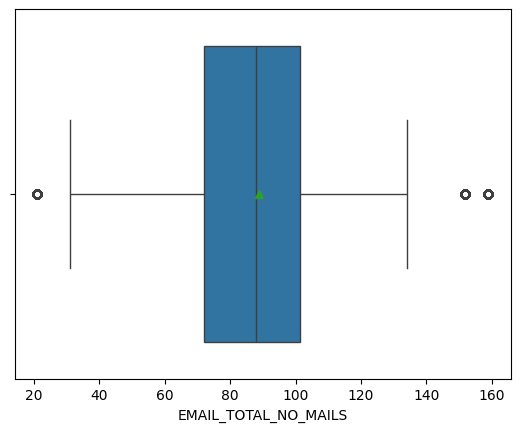

In [5]:
sns.boxplot(
    x = "EMAIL_TOTAL_NO_MAILS",
    showmeans=True,
    data=df
)
plt.show()

Create a distribution plot (histogram + KDE) for 'EMAIL_TOTAL_NO_MAILS'

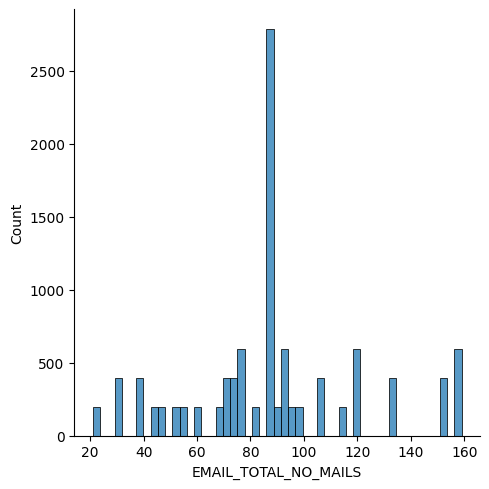

In [10]:
sns.displot(df["EMAIL_TOTAL_NO_MAILS"])
plt.show()

Create a boxplot for 'TOTAL_DEBIT_TRANSACTION'

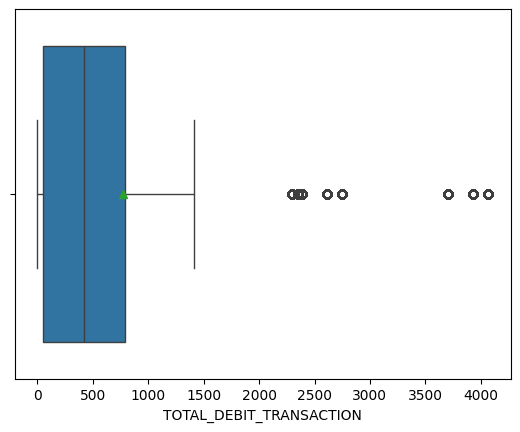

In [11]:
sns.boxplot(
    x = "TOTAL_DEBIT_TRANSACTION",
    showmeans=True,
    data=df
)
plt.show()

# 🔎 Z-Score Method for Outlier Detection

Define the upper and lower bounds for acceptable values (mean ± 3*std)

In [12]:
upper_limit = df['TOTAL_DEBIT_TRANSACTION'].mean() + 3*df['TOTAL_DEBIT_TRANSACTION'].std()
lower_limit = df['TOTAL_DEBIT_TRANSACTION'].mean() - 3*df['TOTAL_DEBIT_TRANSACTION'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 3928.7876127088425
lower limit: -2389.638873943983


Find and display rows where TOTAL_DEBIT_TRANSACTION is an outlier

In [13]:
df.loc[(df['TOTAL_DEBIT_TRANSACTION'] > upper_limit) | (df['TOTAL_DEBIT_TRANSACTION'] < lower_limit)]

,EMAIL_SOFT_BOUNCE_COUNT,EXISTING_EMI,CASA_AMB_Y2Q3,TERMDEPOSIT_AVAILED,CREDITCARD_AVAILED,EMAIL_HARD_BOUNCE_COUNT,STATUS_CODE,DOB,CLTV,CASA_AMB_Y1Q3,...,LEAD_TOPCATEGORYNAME,CUSTOMER_RELATIONSHIP_VINTAGE,TENUREINMONTHS,CASA_AMB_Y2Q2,CASA_AVAILED,NETBANKING_AVAILED,EMAIL_CLICK_COUNT,LEAD_SOURCE,CONSTITUTION,JOBINSTANCEID
4,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
111,0,0,4897.44,No,No,0,Dropped,07-02-95,-51869.46,744.79,...,ASSETS,18-01-12,0,8190.09,Yes,Yes,0,Netbanking,MALE,853B9D814B824B09AE971E224C967A7B
117,0,0,4897.44,No,No,0,Dropped,07-02-95,-51869.46,744.79,...,ASSETS,18-01-12,0,8190.09,Yes,Yes,0,Netbanking,MALE,853B9D814B824B09AE971E224C967A7B
133,0,0,4897.44,No,No,0,Dropped,07-02-95,-51869.46,744.79,...,ASSETS,18-01-12,0,8190.09,Yes,Yes,0,Netbanking,MALE,853B9D814B824B09AE971E224C967A7B
167,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10206,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
10269,0,0,4897.44,No,No,0,Dropped,07-02-95,-51869.46,744.79,...,ASSETS,18-01-12,0,8190.09,Yes,Yes,0,Netbanking,MALE,853B9D814B824B09AE971E224C967A7B
10313,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
10328,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B


Trimming: remove rows where TOTAL_DEBIT_TRANSACTION is an outlier

In [14]:
new_df = df.loc[(df ['TOTAL_DEBIT_TRANSACTION'] < upper_limit) & (df['TOTAL_DEBIT_TRANSACTION'] > lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ',len(new_df))
print('outliers: ', len(df)-len(new_df))

before removing outliers:  10347
after removing outliers:  9949
outliers:  398


<Axes: ylabel='TOTAL_DEBIT_TRANSACTION'>

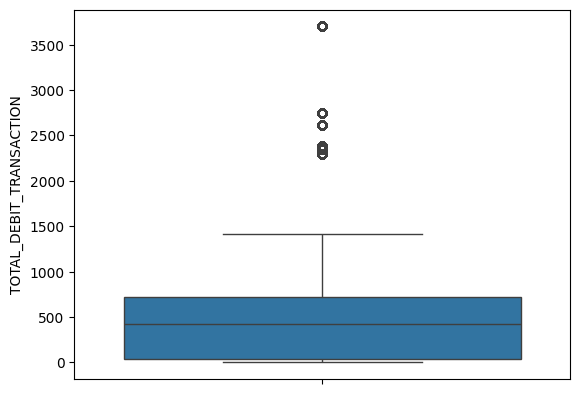

In [15]:
# Boxplot after trimming outliers
sns.boxplot(new_df['TOTAL_DEBIT_TRANSACTION'])

Capping: replace outlier values with upper/lower limit

In [17]:
# Convert the column to float first
new_df['TOTAL_DEBIT_TRANSACTION'] = new_df['TOTAL_DEBIT_TRANSACTION'].astype(float)

# Now assign the capped values
new_df.loc[new_df['TOTAL_DEBIT_TRANSACTION'] > upper_limit, 'TOTAL_DEBIT_TRANSACTION'] = upper_limit
new_df.loc[new_df['TOTAL_DEBIT_TRANSACTION'] < lower_limit, 'TOTAL_DEBIT_TRANSACTION'] = lower_limit

<Axes: ylabel='TOTAL_DEBIT_TRANSACTION'>

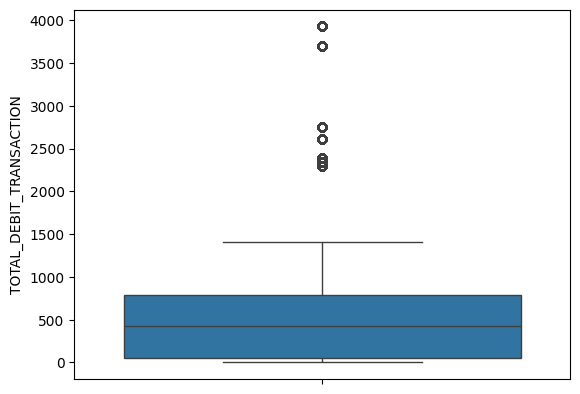

In [18]:
# Boxplot after capping outliers
sns.boxplot(new_df['TOTAL_DEBIT_TRANSACTION'])

# 📐 Percentile Method for Outlier Detection

<Axes: ylabel='TOTAL_DEBIT_TRANSACTION'>

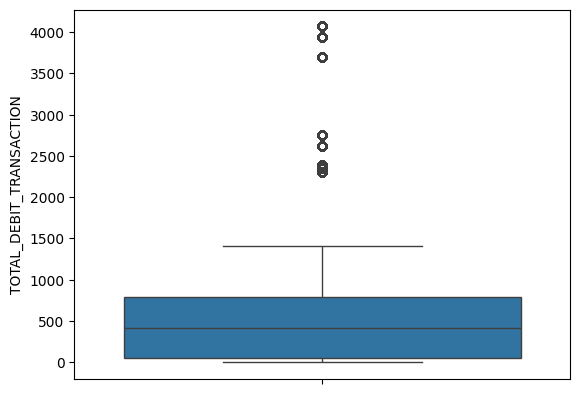

In [19]:
# Boxplot before applying percentile method
sns.boxplot(df['TOTAL_DEBIT_TRANSACTION'])

Define bounds using percentiles (1st and 83rd)

In [20]:
upper_limit= df['TOTAL_DEBIT_TRANSACTION'].quantile(0.83)
lower_limit= df['TOTAL_DEBIT_TRANSACTION'].quantile(0.01)
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  1412.0
lower limit:  0.0


Find and display outliers using percentile method

In [21]:
df.loc[(df['TOTAL_DEBIT_TRANSACTION'] > upper_limit) | (df['TOTAL_DEBIT_TRANSACTION'] < lower_limit)]

,EMAIL_SOFT_BOUNCE_COUNT,EXISTING_EMI,CASA_AMB_Y2Q3,TERMDEPOSIT_AVAILED,CREDITCARD_AVAILED,EMAIL_HARD_BOUNCE_COUNT,STATUS_CODE,DOB,CLTV,CASA_AMB_Y1Q3,...,LEAD_TOPCATEGORYNAME,CUSTOMER_RELATIONSHIP_VINTAGE,TENUREINMONTHS,CASA_AMB_Y2Q2,CASA_AVAILED,NETBANKING_AVAILED,EMAIL_CLICK_COUNT,LEAD_SOURCE,CONSTITUTION,JOBINSTANCEID
1,0,0,2700.99,No,No,0,Assigned,23-05-79,-62409.37,1962.86,...,ASSETS,27-08-12,0,2849.46,Yes,No,0,Campaign,MALE,853B9D814B824B09AE971E224C967A7B
4,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
11,0,0,14059.82,No,No,0,Dropped,10-06-91,-29461.71,5367.85,...,ASSETS,01-06-11,0,18042.90,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
54,0,0,485.04,No,No,0,Dropped,14-03-83,-38483.62,711.88,...,Investments & TPP services,29-07-19,0,985.93,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
62,0,0,2700.99,No,No,0,Assigned,23-05-79,-62409.37,1962.86,...,ASSETS,27-08-12,0,2849.46,Yes,No,0,Campaign,MALE,853B9D814B824B09AE971E224C967A7B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10303,0,0,30685.81,No,No,0,Dropped,07-05-91,-35788.57,9706.83,...,Value Added Services,25-03-17,0,106426.84,Yes,Yes,0,Offers,MALE,853B9D814B824B09AE971E224C967A7B
10313,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
10328,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B
10335,0,0,18289.35,No,No,0,Dropped,10-09-94,-56741.14,17387.54,...,Digital,05-04-17,0,22400.05,Yes,No,0,BRANCH STAFF REFFERAL,MALE,853B9D814B824B09AE971E224C967A7B


Capping using percentile bounds

In [22]:
new_df = df.copy()
new_df.loc[(new_df['TOTAL_DEBIT_TRANSACTION']>upper_limit), 'TOTAL_DEBIT_TRANSACTION'] = upper_limit
new_df.loc[(new_df['TOTAL_DEBIT_TRANSACTION']<lower_limit), 'TOTAL_DEBIT_TRANSACTION'] = lower_limit

<Axes: ylabel='TOTAL_DEBIT_TRANSACTION'>

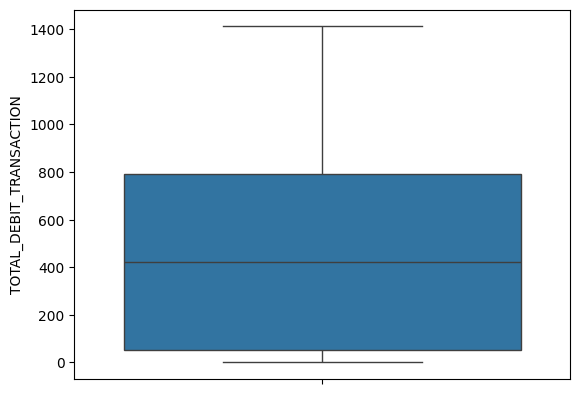

In [23]:
# Boxplot after capping using percentile method
sns.boxplot(new_df['TOTAL_DEBIT_TRANSACTION'])